# Test allocation based on risk of infection from first and second order contact tracing for Covid - 19

###  Parameter setting on the Open ABM model

In [1]:
n_total = 50000 #number of individuals 
initial_inf = 10 #number of patients zero
T = 100 #number of days
seed_open_ABM = 1 # seed for the Open ABM 
qri = 0 #type of quarantine (1: work, 0: work and random)

### Parameter setting on the intervention method

In [2]:
t_0 = 12  #time to start the intervention method
test_availables = 125 #number of daily tests
qh =  False #to quarantine individuals in the same household 
th = False #to test individuals in the same hoisehold
p_SS = 1 #proportion of individuals with severe symptomps self reported by day
p_SM = 0.75 #proportion of individuals with mild symptomps self reported by day
seed = 2 #seed for the ranking method (different to 1 because seed = 1 is fixed for the random tests) 
days_of_quarantine = 100 #days of quarantine
output_dir = "./simulation_results/"
time_infection = 'estimation' #type of estimation for the time of infection ('estimation': tau, 'constant': alpha, True: real time of infection)
tp_rate = 1 #sensitivity of the tests
tn_rate = 1 #specificity of the tests
test_symptoms_type = 0  #0: to detect a proportion p of individuals with symptomps, 
                        #1: to detect individuals following a geometric distribution with parameter p 
quarantine_adoption_fraction = 1 #probability of each individual adhering to the quarantine

### Parameter setting on the contact tracing method

In [3]:
prob_function = 'lambda'#probability function('lambda', 'cte': probability constant = 1/2)
gamma = 6 #time-frame for the time of infection of the individual at risk
zeta = gamma + 3 #time-frame for the time of infection of the 1°contact in 2°CT

### Import the intervention model and ranking methods

In [4]:
from intervention_strategies.intervention_model import *
from intervention_strategies.First_Degree_Contact_Tracing_Risk import *
from intervention_strategies.Second_Degree_Contact_Tracing_Risk import *
from intervention_strategies.Contact_Tracing import *
from intervention_strategies.Random_Selection import *

#### Running the 2°CT ranking method

In [5]:
timeseries_sim_2_CT = run_intervention_model(ranked_method = Second_Degree_Contact_Tracing_Risk(gamma = gamma, zeta = zeta, prob_function = prob_function), 
                                             n_total = n_total, 
                                             initial_inf = initial_inf,
                                             t_0 = t_0,
                                             t_end = T,
                                             test_availables = test_availables,
                                             quarantine_household = qh,                                             
                                             test_household = th,
                                             p_SS = p_SS,
                                             p_SM = p_SM,                                              
                                             seed = seed, 
                                             seed_open_ABM = seed_open_ABM,
                                             output_dir= output_dir,
                                             time_infection = time_infection,
                                             quarantined_random_interactions = qri,
                                             quarantine_adoption_fraction = quarantine_adoption_fraction,
                                             test_symptoms_type = test_symptoms_type, 
                                             tp_rate = tp_rate, 
                                             tn_rate = tn_rate)


BREAK: no more infected individuals
Total infected at time 100 for 2°CT : 183


#### Running the 1°CT ranking method

In [6]:
timeseries_sim_1_CT = run_intervention_model(ranked_method = First_Degree_Contact_Tracing_Risk(gamma = gamma, prob_function = prob_function),  
                                             n_total = n_total, 
                                             initial_inf = initial_inf,
                                             t_0 = t_0,
                                             t_end = T,
                                             test_availables = test_availables,
                                             quarantine_household = qh,                                             
                                             test_household = th,
                                             p_SS = p_SS,
                                             p_SM = p_SM,                                              
                                             seed = seed, 
                                             seed_open_ABM = seed_open_ABM,
                                             output_dir= output_dir,
                                             time_infection = time_infection,
                                             quarantined_random_interactions = qri,
                                             quarantine_adoption_fraction = quarantine_adoption_fraction,
                                             test_symptoms_type = test_symptoms_type, 
                                             tp_rate = tp_rate, 
                                             tn_rate = tn_rate)

Total infected at time 100 for 1°CT : 5673


#### Running the CT ranking method

In [7]:
timeseries_sim_CT = run_intervention_model(ranked_method = Contact_Tracing(gamma = gamma), 
                                           n_total = n_total, 
                                           initial_inf = initial_inf,
                                           t_0 = t_0,
                                           t_end = T,
                                           test_availables = test_availables,
                                           quarantine_household = qh,                                             
                                           test_household = th,
                                           p_SS = p_SS,
                                           p_SM = p_SM,                                              
                                           seed = seed, 
                                           seed_open_ABM = seed_open_ABM,
                                           output_dir= output_dir,
                                           time_infection = time_infection,
                                           quarantined_random_interactions = qri,
                                           quarantine_adoption_fraction = quarantine_adoption_fraction,
                                           test_symptoms_type = test_symptoms_type, 
                                           tp_rate = tp_rate, 
                                           tn_rate = tn_rate)


Total infected at time 100 for CT : 36079


#### Running the RS ranking method

In [8]:
timeseries_sim_RS = run_intervention_model(ranked_method = Random_Selection(), 
                                           n_total = n_total, 
                                           initial_inf = initial_inf,
                                           t_0 = t_0,
                                           t_end = T,
                                           test_availables = test_availables,
                                           quarantine_household = qh,                                             
                                           test_household = th,
                                           p_SS = p_SS,
                                           p_SM = p_SM,                                              
                                           seed = seed, 
                                           seed_open_ABM = seed_open_ABM,
                                           output_dir= output_dir,
                                           time_infection = time_infection,
                                           quarantined_random_interactions = qri,
                                           quarantine_adoption_fraction = quarantine_adoption_fraction,
                                           test_symptoms_type = test_symptoms_type, 
                                           tp_rate = tp_rate, 
                                           tn_rate = tn_rate)

Total infected at time 100 for RS : 37083


### Plot 

In [9]:
import matplotlib.pyplot as plt

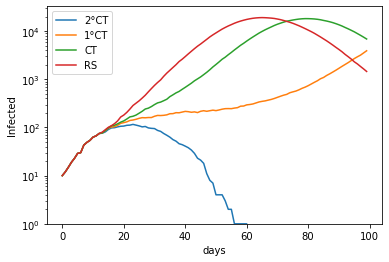

In [10]:
fig, ax = plt.subplots()

ax.plot(timeseries_sim_2_CT["time"],timeseries_sim_2_CT["active"], label = '2°CT')
ax.plot(timeseries_sim_1_CT["time"],timeseries_sim_1_CT["active"], label = '1°CT')
ax.plot(timeseries_sim_CT["time"],timeseries_sim_CT["active"], label = 'CT')
ax.plot(timeseries_sim_RS["time"],timeseries_sim_RS["active"], label = 'RS')

leg = ax.legend();

plt.semilogy()
plt.ylim([1,2**15])
plt.ylabel("Infected")
plt.xlabel("days")
plt.legend()
plt.show()